In [1]:
cd ..

/home/cc/Gloss/Spoter-SL


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 


In [4]:
import multiprocessing as mp

mp.set_start_method('spawn')

In [5]:
from torchvision import transforms

from Src.datasets.SpoterDataset import SpoterDataset
from Src.datasets.SpoterDataLoader import SpoterDataLoader

from Src.datasets.drawing import drawing
from Src.spoter.gaussian_noise import GaussianNoise

/home/cc/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
import torch
import os

In [7]:
seed = 379

gaussian_mean = 0
gaussian_std = 0.001
augmentation = True

factor_aug = 2
training_set_path   = "../SL_ConnectingPoints/split/DGI305-AEC--38--incremental--mediapipe_n_folds_5_seed_1_klod_1-Train.hdf5"
validation_set_path= "../SL_ConnectingPoints/split/DGI305-AEC--38--incremental--mediapipe_n_folds_5_seed_1_klod_1-Val.hdf5"

In [8]:
# Initialize all the random seeds
random.seed(seed)
np.random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
g = torch.Generator()
g.manual_seed(seed)

In [9]:
transform = transforms.Compose([GaussianNoise(gaussian_mean, gaussian_std)])

In [15]:
train_set = SpoterDataset(training_set_path, transform=transform, has_augmentation=True,
                           keypoints_model='mediapipe',factor=factor_aug)

********************
********************
********************
Use keypoint model :  mediapipe
self.list_labels_banned []
path                       : ../SL_ConnectingPoints/split/DGI305-AEC--38--incremental--mediapipe_n_folds_5_seed_1_klod_1-Train.hdf5
keypoints_model            : mediapipe
landmarks_ref              : Data/Mapeo landmarks librerias.csv
threshold_frecuency_labels : 0
list_labels_banned         : []
Use keypoint model :  mediapipe
use column for index keypoint : mp_indexInArray
 using keypoints_number: 54
section_keypoints :  54  -- uniques:  54
name_keypoints    :  54  -- uniques:  33
idx_keypoints     :  54  -- uniques:  54

section_keypoints used:
['pose_nose' 'pose_left_eye' 'pose_right_eye' 'pose_left_ear'
 'pose_right_ear' 'pose_left_shoulder' 'pose_right_shoulder'
 'pose_left_elbow' 'pose_right_elbow' 'pose_left_wrist' 'pose_right_wrist'
 'leftHand_wrist' 'leftHand_thumb_cmc' 'leftHand_thumb_mcp'
 'leftHand_thumb_ip' 'leftHand_thumb_tip' 'leftHand_index_finger_m

 21%|████████████████████████████████▎                                                                                                                         | 156/744 [00:00<00:00, 1546.28it/s]

original size video :  (19, 544, 2) -- label :  ESPERAR
filtering by keypoints idx .. 
filtered size video :  (19, 54, 2) -- label :  ESPERAR


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 744/744 [00:00<00:00, 1600.85it/s]


frecuency labels filtering ...
hist counter
{'ESPERAR': 15, 'OYE': 14, 'VER': 36, 'YO': 36, 'DINERO': 12, 'CUANTO': 13, 'DENTRO': 16, 'UNO': 25, 'CAMINAR-PERSONA': 21, 'MI': 16, 'IDEA': 14, 'IGUAL': 29, 'HOY': 14, 'NIÑO': 17, 'DORMIR': 16, 'AHORA': 20, 'YA': 20, 'SOL': 11, 'DOS': 33, 'GUARDAR': 14, 'BIEN': 36, 'AMIGO': 13, 'DECIR': 27, 'IR': 22, 'HACER': 16, 'HOLA': 9, 'ESCRIBIR': 12, 'SENTIR': 12, 'PENSAR': 29, 'COMPRAR': 13, 'NO': 32, 'CASA': 13, 'CIEN': 28, 'SABER': 12, 'COMER': 36, 'AYUDAR': 12, 'QUÉ': 13, 'TRES': 17}
sorted(set(labels_dataset))  :  ['AHORA', 'AMIGO', 'AYUDAR', 'BIEN', 'CAMINAR-PERSONA', 'CASA', 'CIEN', 'COMER', 'COMPRAR', 'CUANTO', 'DECIR', 'DENTRO', 'DINERO', 'DORMIR', 'DOS', 'ESCRIBIR', 'ESPERAR', 'GUARDAR', 'HACER', 'HOLA', 'HOY', 'IDEA', 'IGUAL', 'IR', 'MI', 'NIÑO', 'NO', 'OYE', 'PENSAR', 'QUÉ', 'SABER', 'SENTIR', 'SOL', 'TRES', 'UNO', 'VER', 'YA', 'YO']
dict_labels_dataset      : {'AHORA': 0, 'AMIGO': 1, 'AYUDAR': 2, 'BIEN': 3, 'CAMINAR-PERSONA': 4, 'CASA': 5

In [16]:
train_loader = SpoterDataLoader(train_set, shuffle=True, generator=g, batch_size=32, 
                        num_workers=4, pin_memory=True)

In [17]:
drawer = drawing(w = 256,h = 256,path_points= '../SL_ConnectingPoints/dataCleaningFunctions/points_54.csv')

In [86]:
#time       : 45.11360001564026 / 32 con augmentation

#time       : 35.1314697265625 /32 con augmentation solo rotate
#time       : 0.27489733695983887 /32 con augmentation solo rotate NEW :D

#time       : 0.05941438674926758 /32 con augmentation solo squeeze
#time       : 0.049521446228027344 /32 con augmentation solo perspective

#time       : 10.991130113601685 /32 con augmentation solo augment_arm_joint_rotate
#time       : 0.7523014545440674 /32 con augmentation solo augment_arm_joint_rotate NEW :D

#time       : 0.11679577827453613/ 32 sin augmentation 
#time       : 0.11679577827453613/ 32 sin augmentation 

In [111]:
import time

start = time.time()
# Obtener un batch 
depth_map_batch, label_batch, video_name_batch = next(iter(train_loader))

# Mostrar valores 
print(f"video_name : {video_name_batch[:4]}")
print(f"label      : {label_batch[:4]}")
print(f"depth_map  : {len(depth_map_batch)}")

print(f"time       : {time.time()-start}")

video_name : ['Videos/SEGMENTED_SIGN/CONTAR-DINERO_ORACION_1/DINERO_1_9.mp4', 'proteinas_porcentajes/igual_1437.mp4', 'Videos/SEGMENTED_SIGN/DENTRO_1/DENTRO_1_1.mp4', 'Videos/SEGMENTED_SIGN/JOVEN_ORACION_1/DECIR_1_1.mp4']
label      : [tensor([12], device='cuda:0'), tensor([22], device='cuda:0'), tensor([11], device='cuda:0'), tensor([10], device='cuda:0')]
depth_map  : 32
time       : 0.7523014545440674


In [99]:
import math
math.radians(45),math.radians(-45),math.radians(180+45)

(0.7853981633974483, -0.7853981633974483, 3.9269908169872414)

depth_map  : (20, 54, 2)


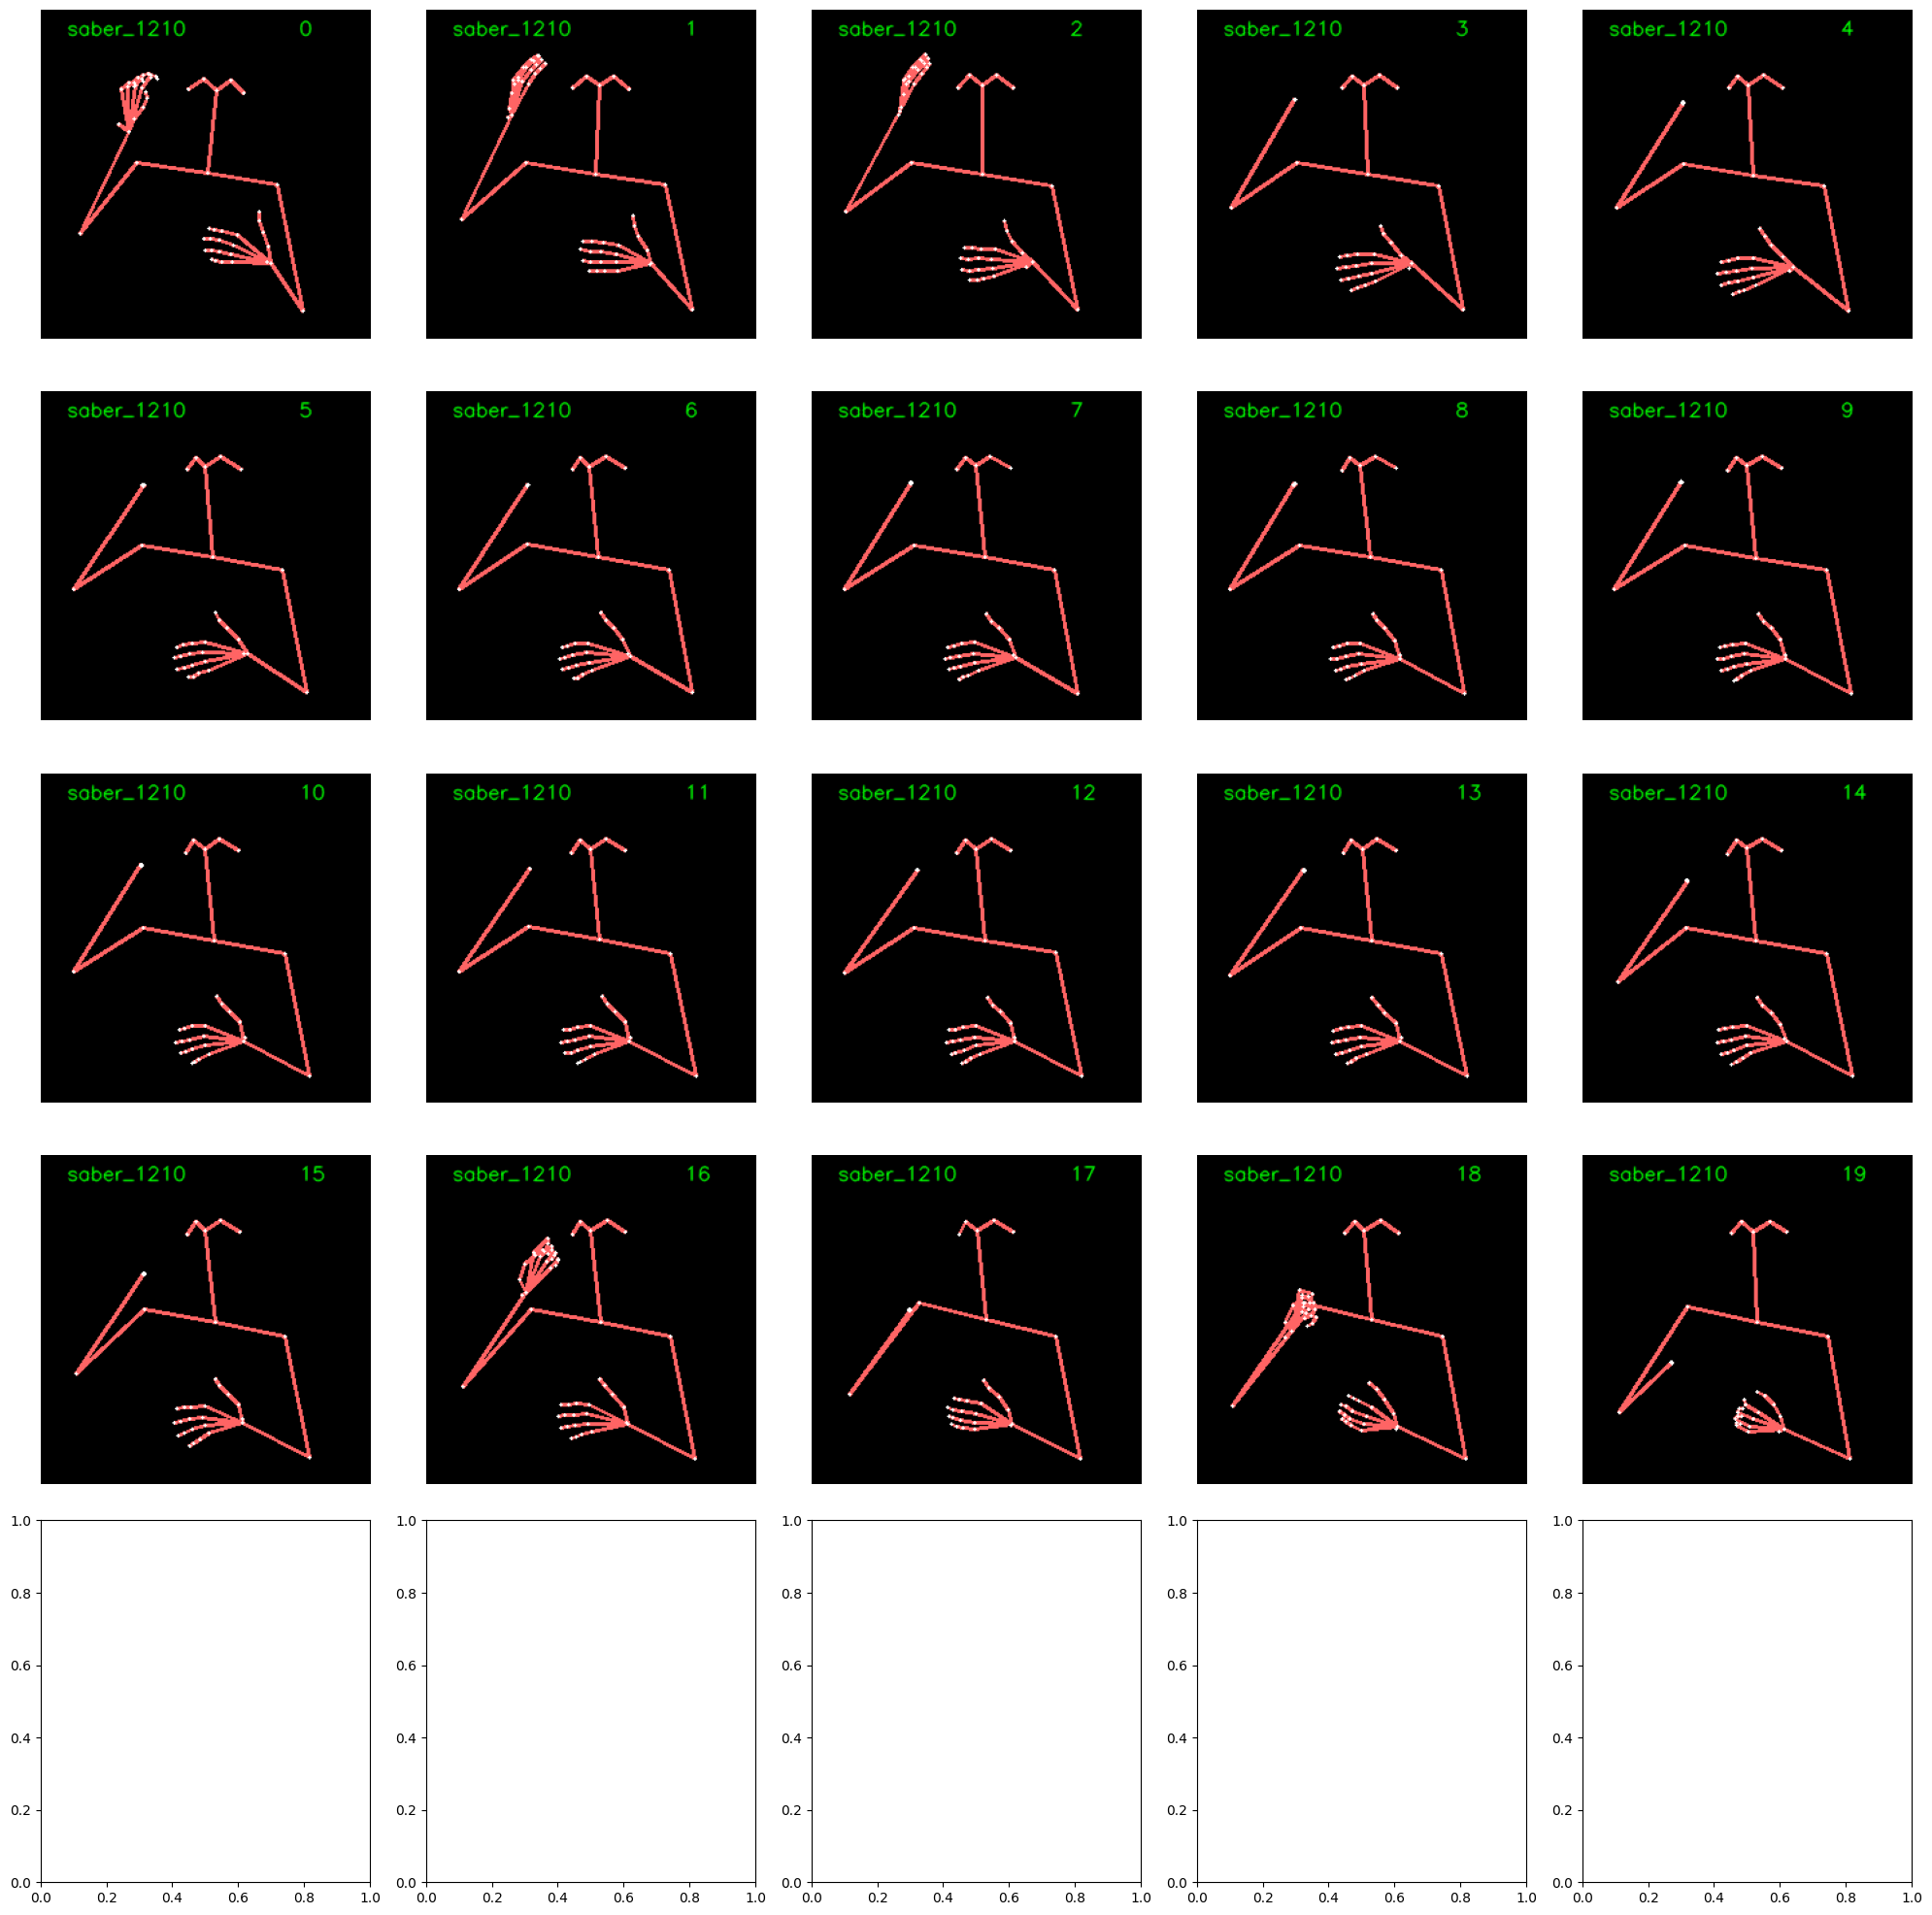

In [56]:
depth_map  = depth_map_batch[0].cpu().numpy()
label_name       = video_name_batch[0].split("/")[-1].split(".")[0]

print(f"depth_map  : {depth_map.shape}")

list_images = []
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        try:
            kp_frame = depth_map[i*5 + j] +0.5
            img = drawer.draw_lines(kp_frame,text_left=label_name,text_right=str(i*5 + j))

            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            list_images.append(img)       
        except:
            pass
plt.tight_layout() 
plt.savefig('Results/images/matriz_imagenes.jpg')
plt.show()
#fig.canvas.draw()  # Esto renderizará la figura
plt.close(fig)
image_matrix = np.array(fig.canvas.renderer.buffer_rgba())    


depth_map  : (7, 54, 2)


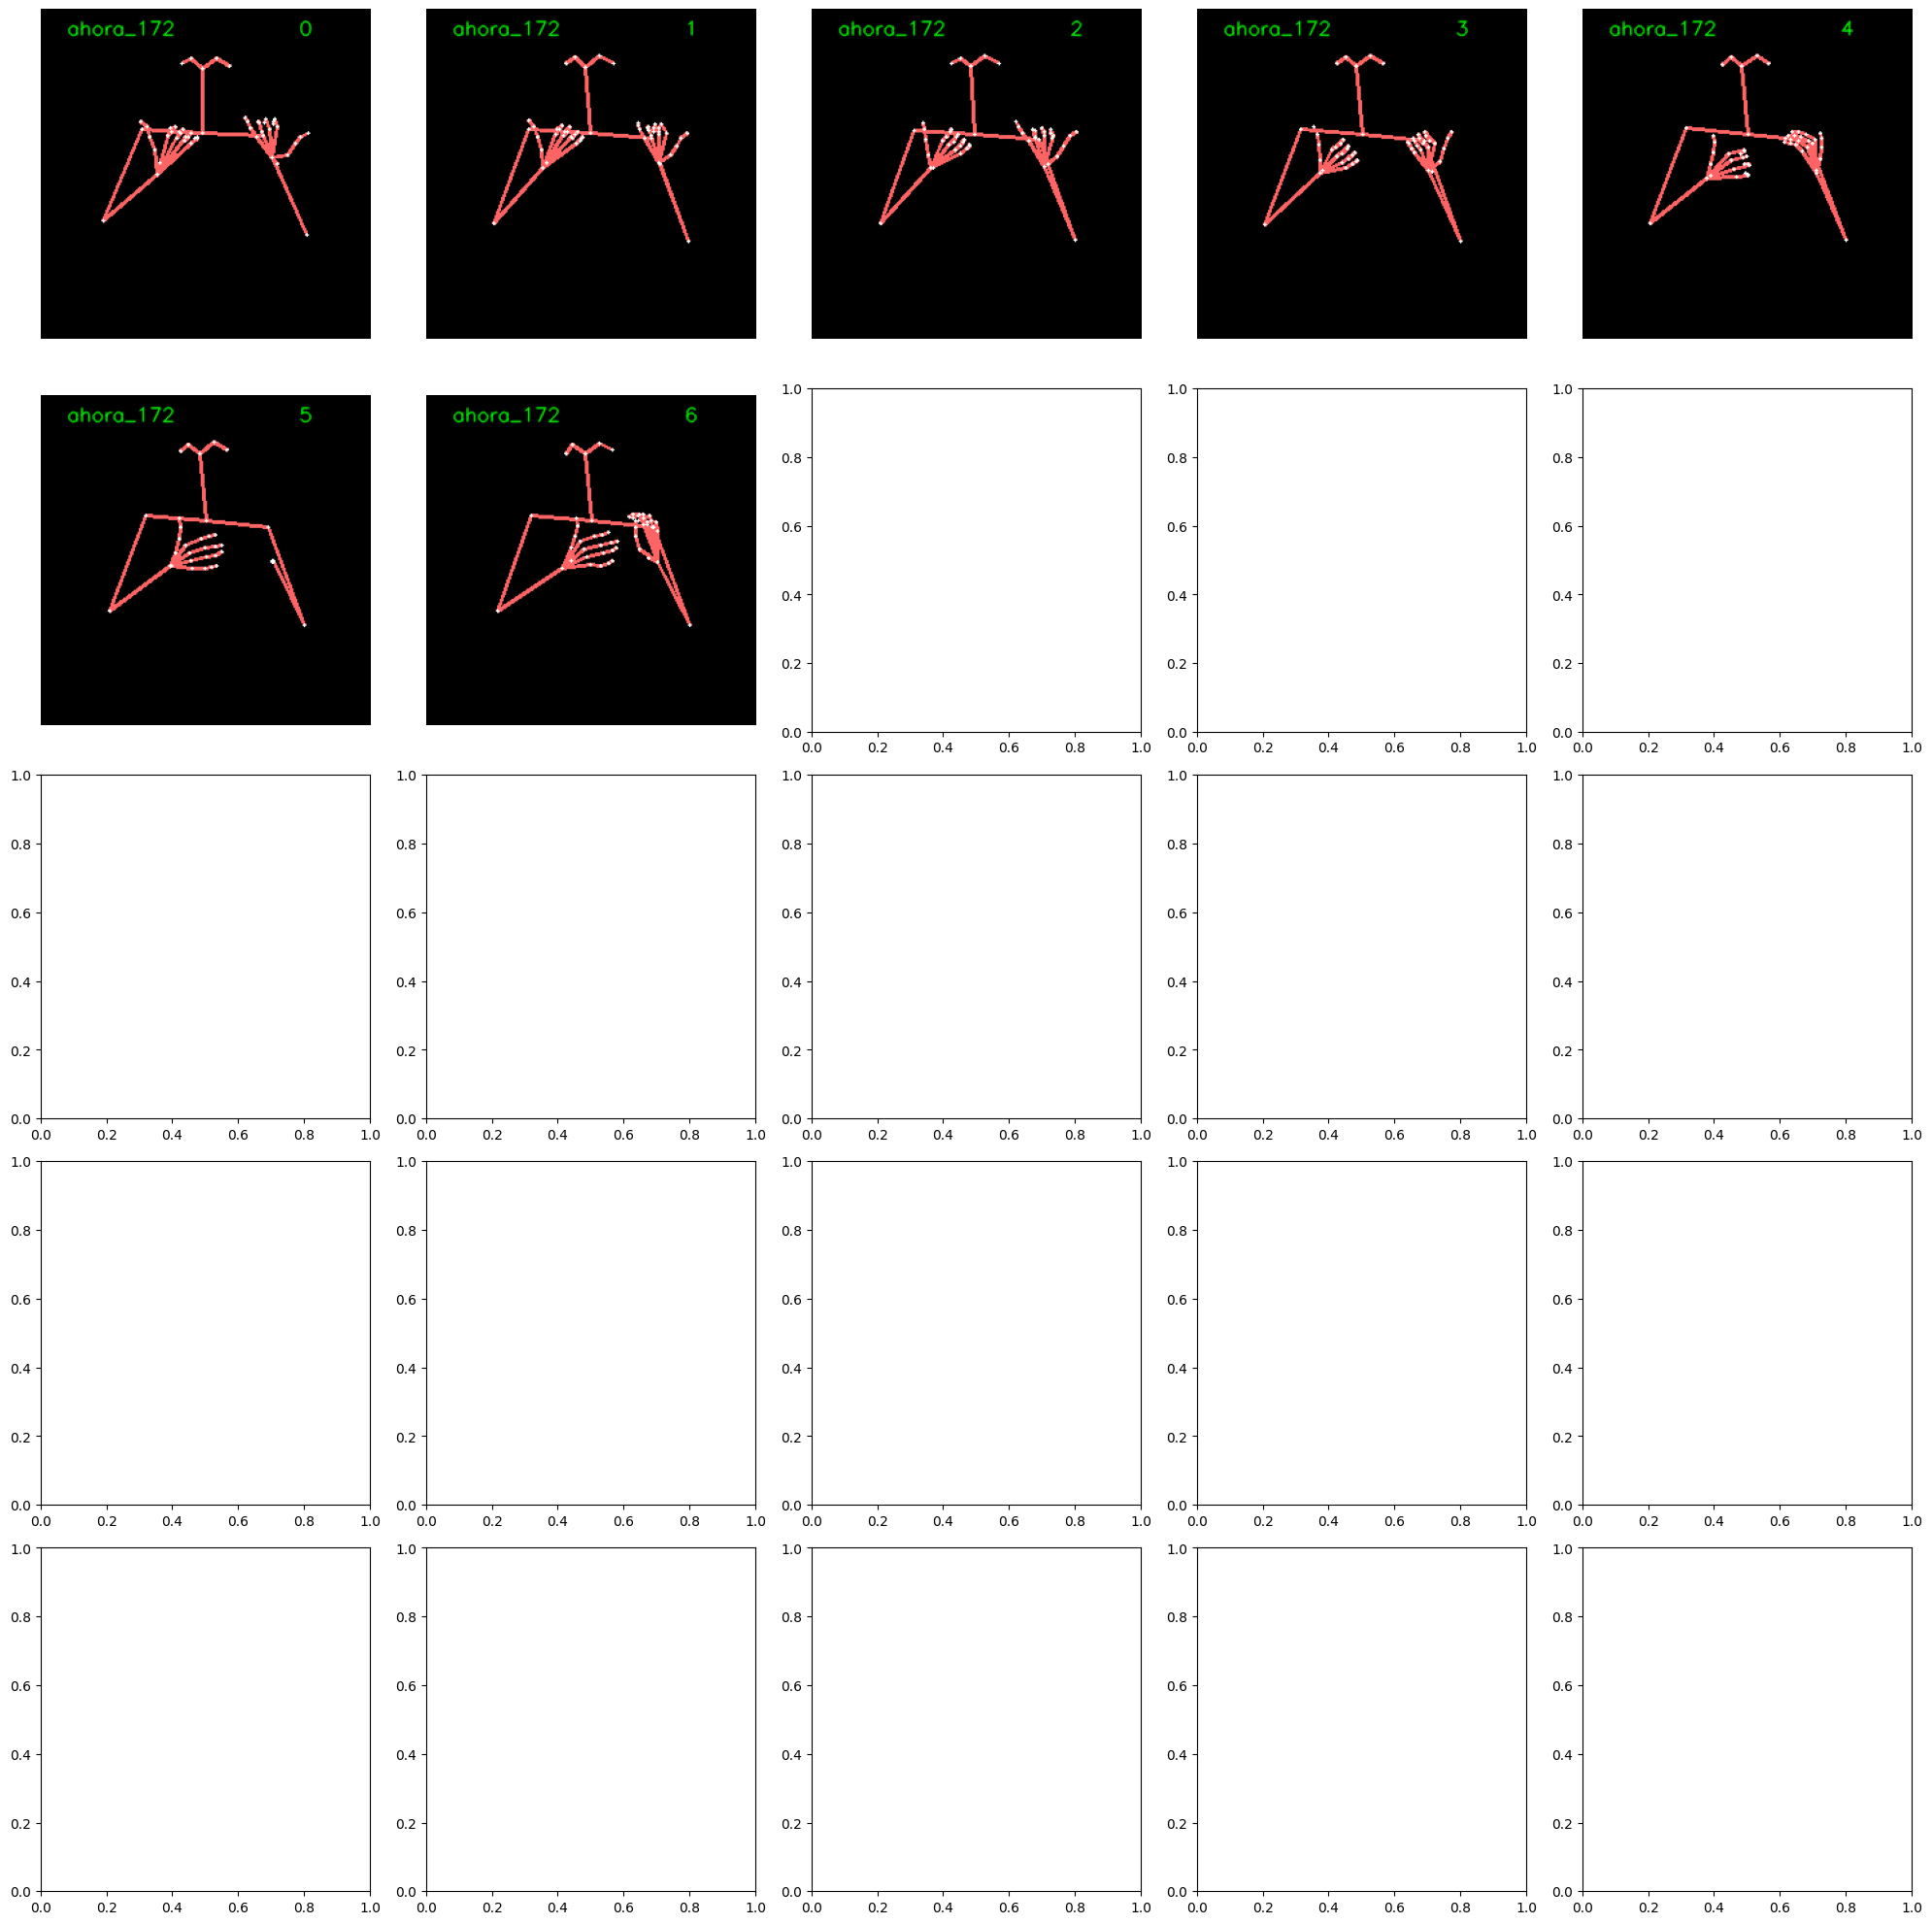

In [57]:
depth_map  = depth_map_batch[1].cpu().numpy()
label_name       = video_name_batch[1].split("/")[-1].split(".")[0]

print(f"depth_map  : {depth_map.shape}")

list_images = []
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        try:
            kp_frame = depth_map[i*5 + j] +0.5
            img = drawer.draw_lines(kp_frame,text_left=label_name,text_right=str(i*5 + j))

            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            list_images.append(img)       
        except:
            pass
plt.tight_layout() 
plt.savefig('Results/images/matriz_imagenes.jpg')
plt.show()
#fig.canvas.draw()  # Esto renderizará la figura
plt.close(fig)
image_matrix = np.array(fig.canvas.renderer.buffer_rgba())    


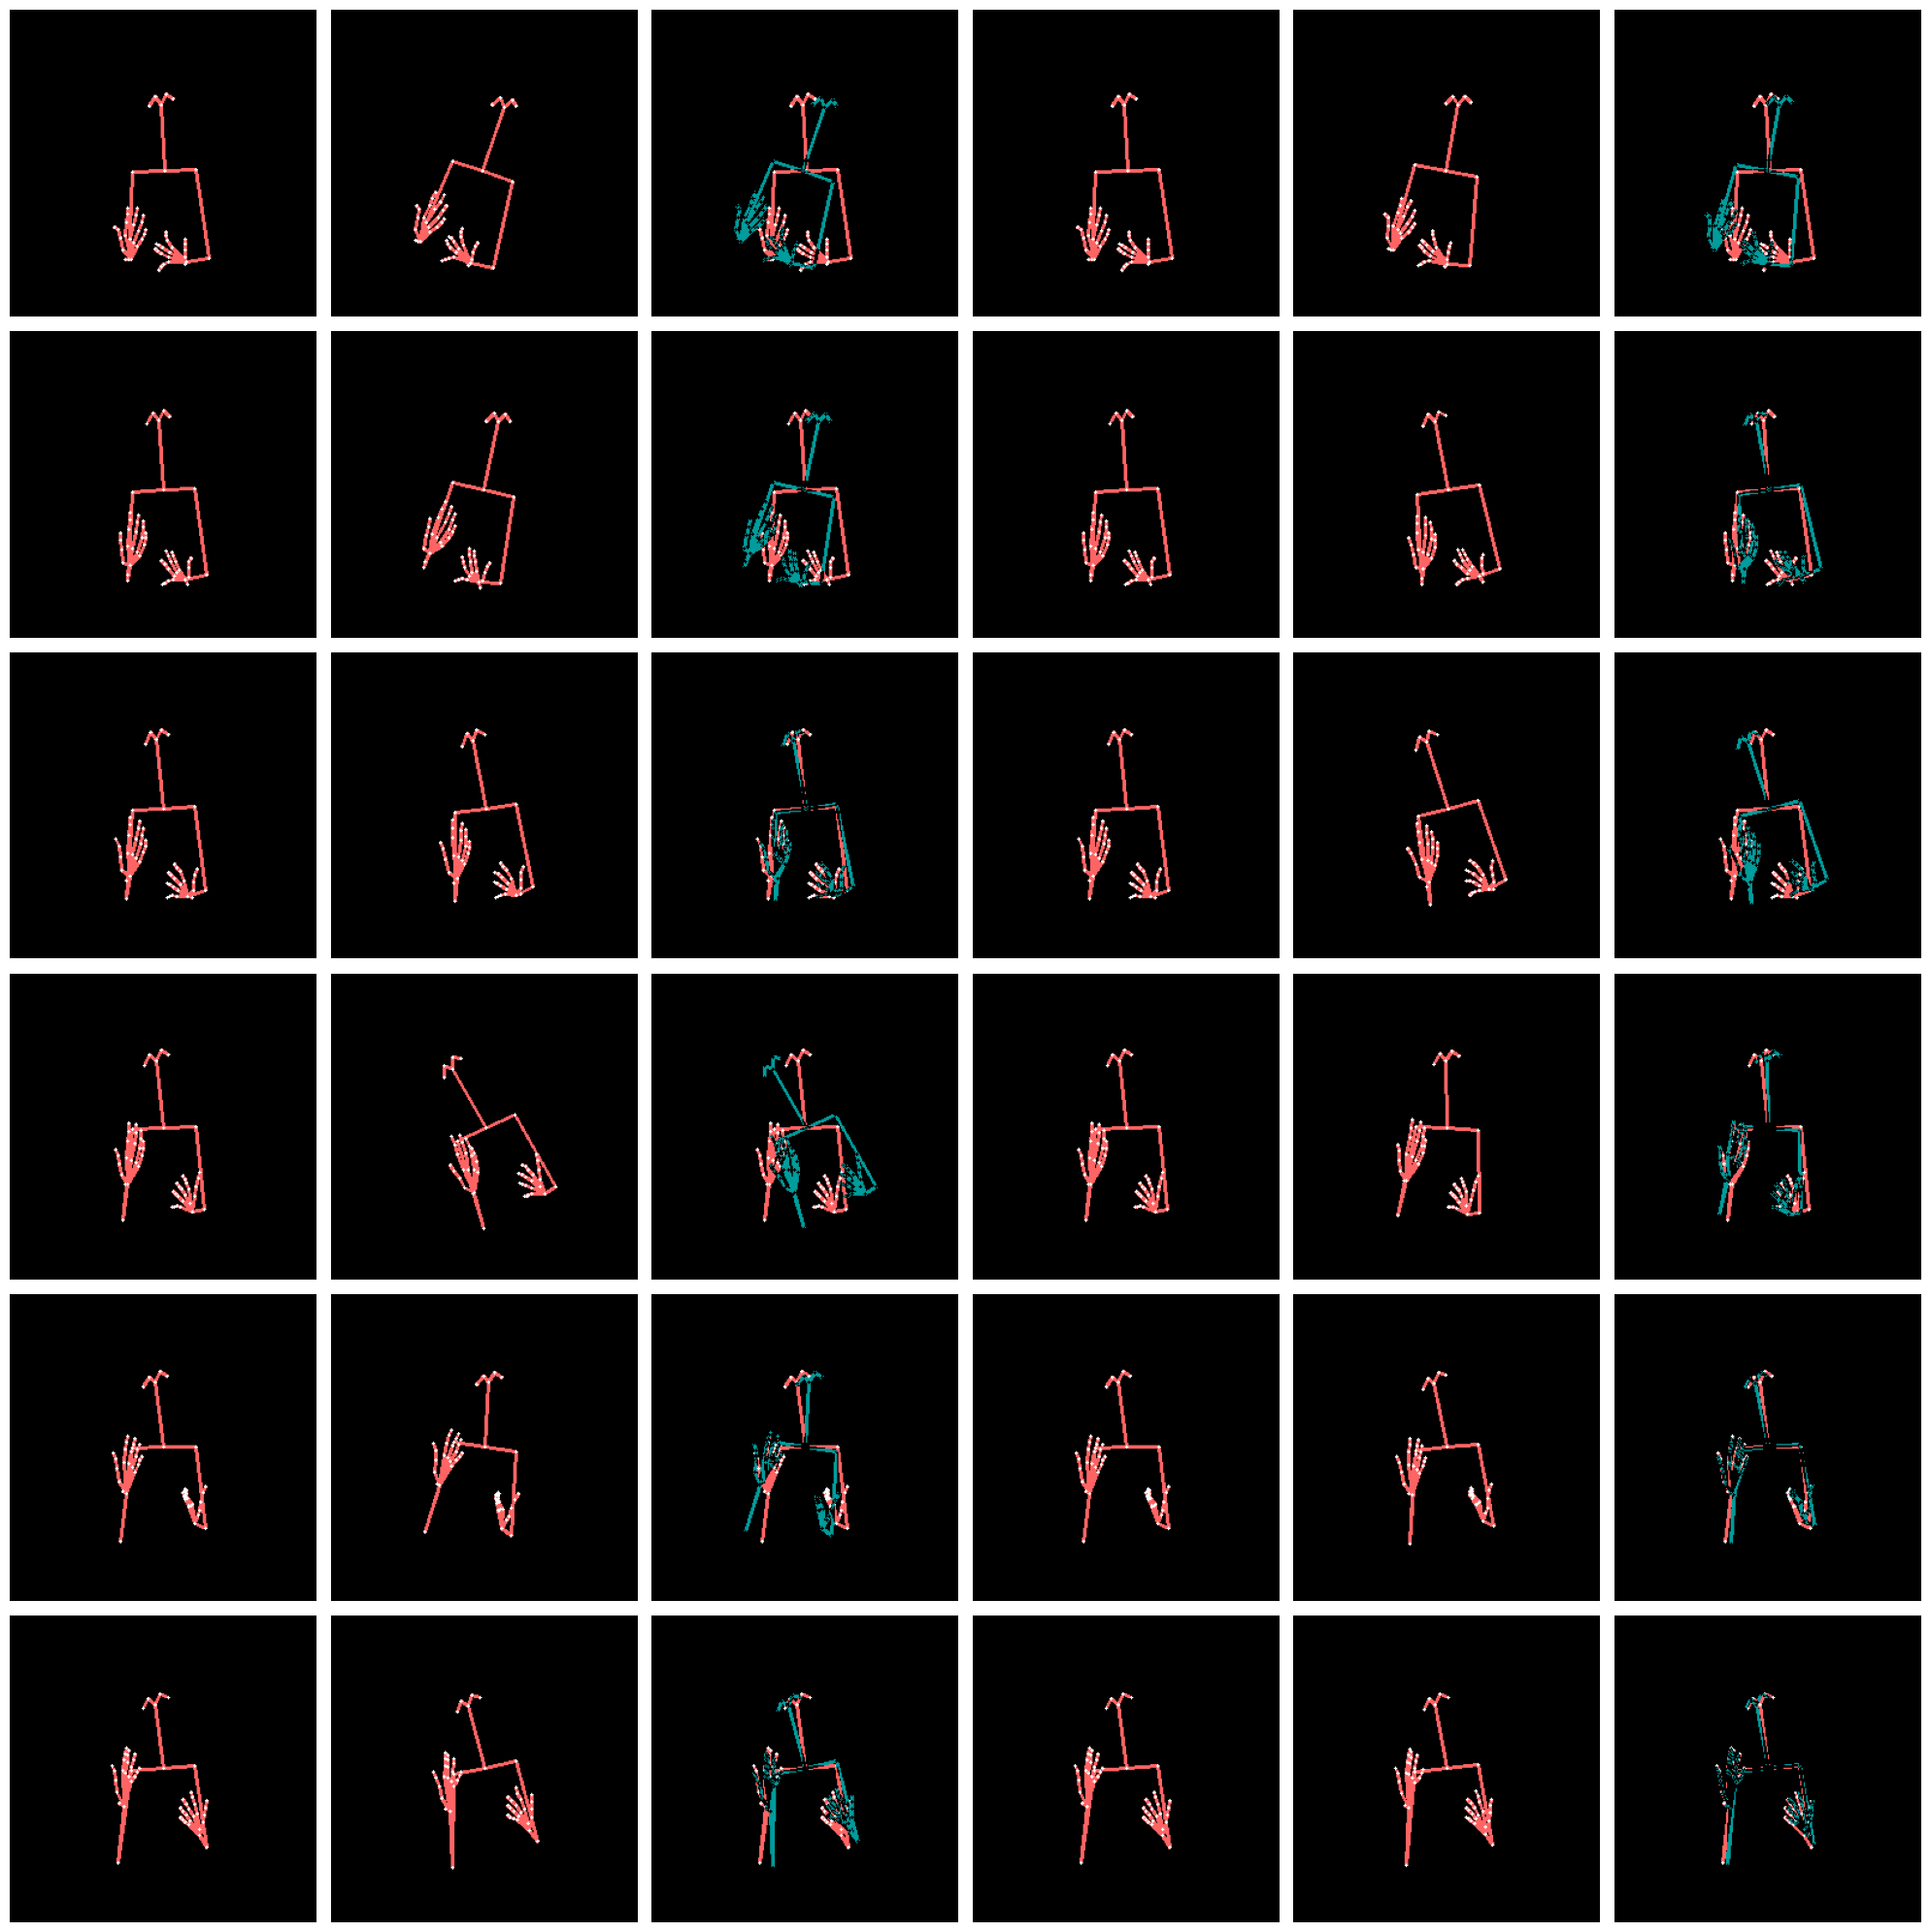

In [89]:
import torch
import copy

depth_map  = train_loader.dataset.data[0]
depth_map = torch.tensor(depth_map, device='cuda')#.clone()


fig, axs = plt.subplots(6, 6, figsize=(20, 20))
for i in range(6):
    for j in range(2):
        #try:
            depth_map_transformed = train_set.augmentation.augment_rotate(copy.deepcopy(depth_map), angle_range=(-23, 23))
            frame = depth_map[i] 
            frame_transformed = depth_map_transformed[i]

            img_frame = drawer.draw_lines(frame)
            img_frame_transformed = drawer.draw_lines(frame_transformed)
            img_frame_diff = img_frame - img_frame_transformed

            for w,img in enumerate([img_frame,
                                    img_frame_transformed,img_frame_diff]):
                axs[i, 3*j+w].imshow(img)
                axs[i, 3*j+w].axis('off')            
        #except:
        #    pass
plt.tight_layout() 
plt.show()

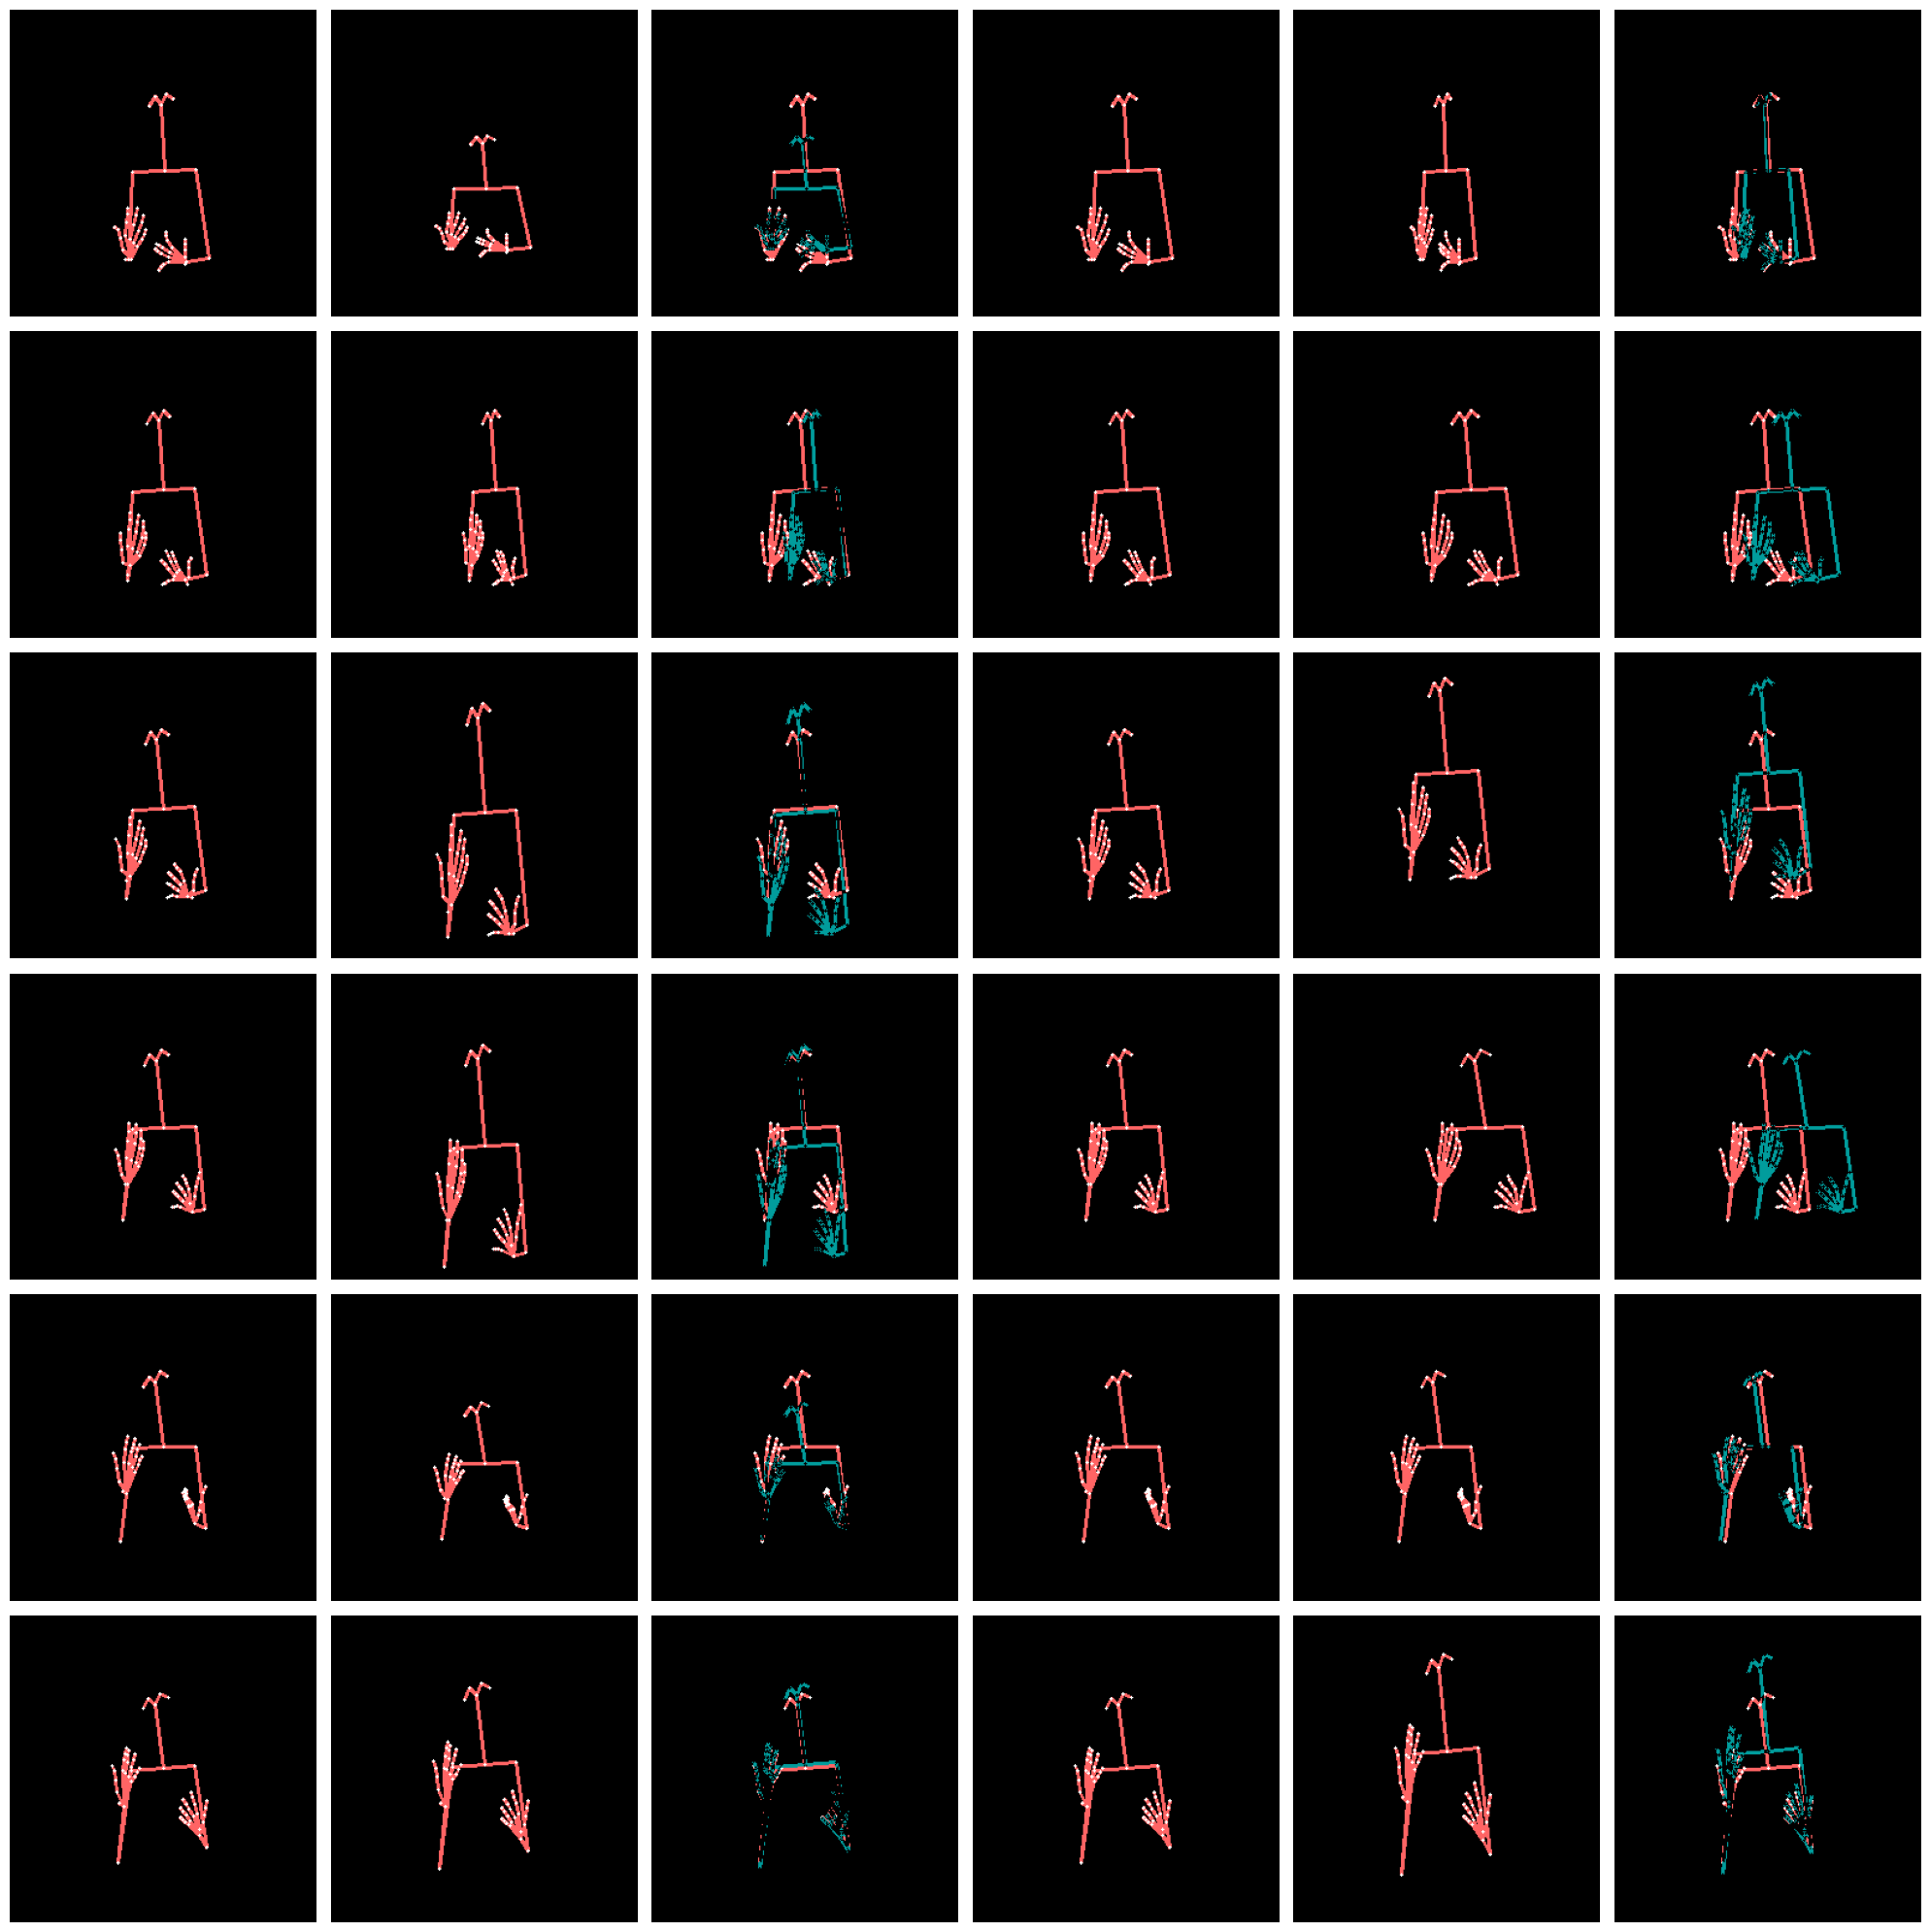

In [80]:
import torch
import copy

depth_map  = train_loader.dataset.data[0]
depth_map = torch.tensor(depth_map, device='cuda')#.clone()


fig, axs = plt.subplots(6, 6, figsize=(20, 20))
for i in range(6):
    for j in range(2):
        #try:
            depth_map_transformed = train_set.augmentation.augment_shear(copy.deepcopy(depth_map), "squeeze", 
                                                                         squeeze_ratio=(0.25, -0.25))
            frame = depth_map[i] 
            frame_transformed = depth_map_transformed[i]

            img_frame = drawer.draw_lines(frame)
            img_frame_transformed = drawer.draw_lines(frame_transformed)
            img_frame_diff = img_frame - img_frame_transformed

            for w,img in enumerate([img_frame,
                                    img_frame_transformed,img_frame_diff]):
                axs[i, 3*j+w].imshow(img)
                axs[i, 3*j+w].axis('off')            
        #except:
        #    pass
plt.tight_layout() 
plt.show()

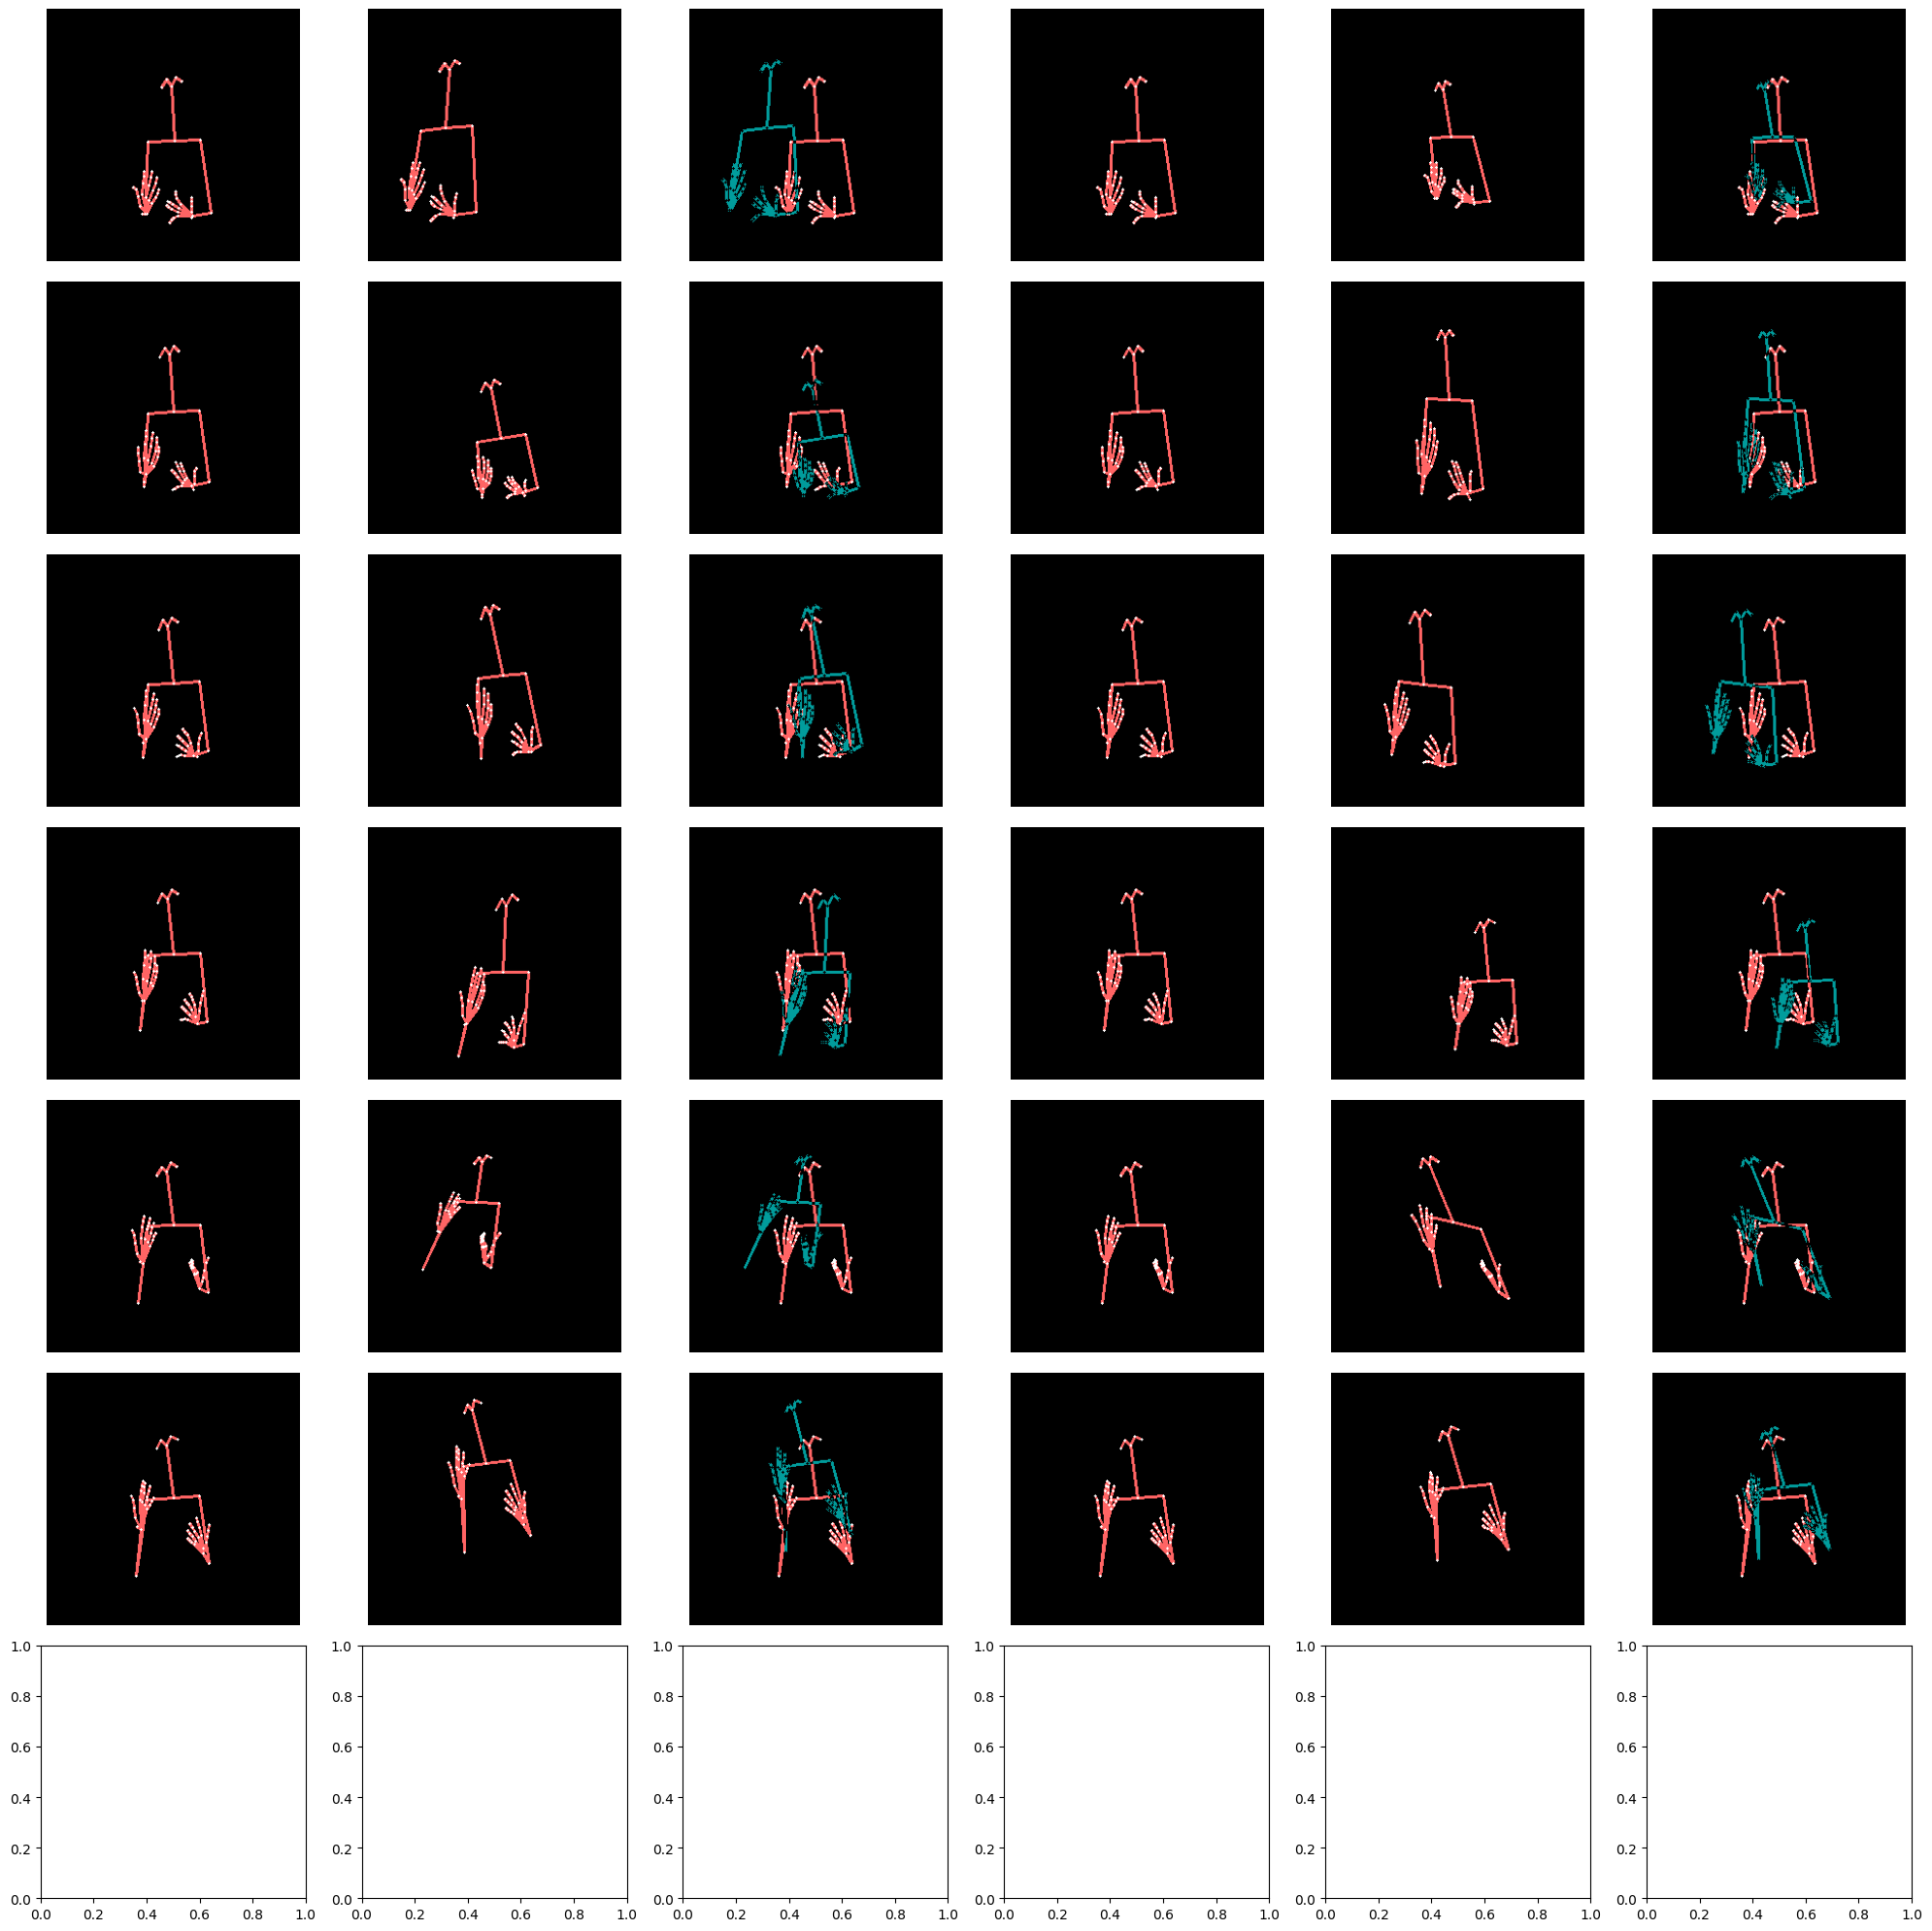

In [82]:
import torch
import copy

depth_map  = train_loader.dataset.data[0]
depth_map = torch.tensor(depth_map, device='cuda')#.clone()


fig, axs = plt.subplots(7, 6, figsize=(20, 20))
for i in range(6):
    for j in range(2):
        #try:
            depth_map_transformed = train_set.augmentation.augment_shear(copy.deepcopy(depth_map), "perspective", 
                                                                         squeeze_ratio=(-0.2, 0.2))
            frame = depth_map[i] 
            frame_transformed = depth_map_transformed[i]

            img_frame = drawer.draw_lines(frame)
            img_frame_transformed = drawer.draw_lines(frame_transformed)
            img_frame_diff = img_frame - img_frame_transformed

            for w,img in enumerate([img_frame,
                                    img_frame_transformed,img_frame_diff]):
                axs[i, 3*j+w].imshow(img)
                axs[i, 3*j+w].axis('off')            
        #except:
        #    pass
plt.tight_layout() 
plt.show()

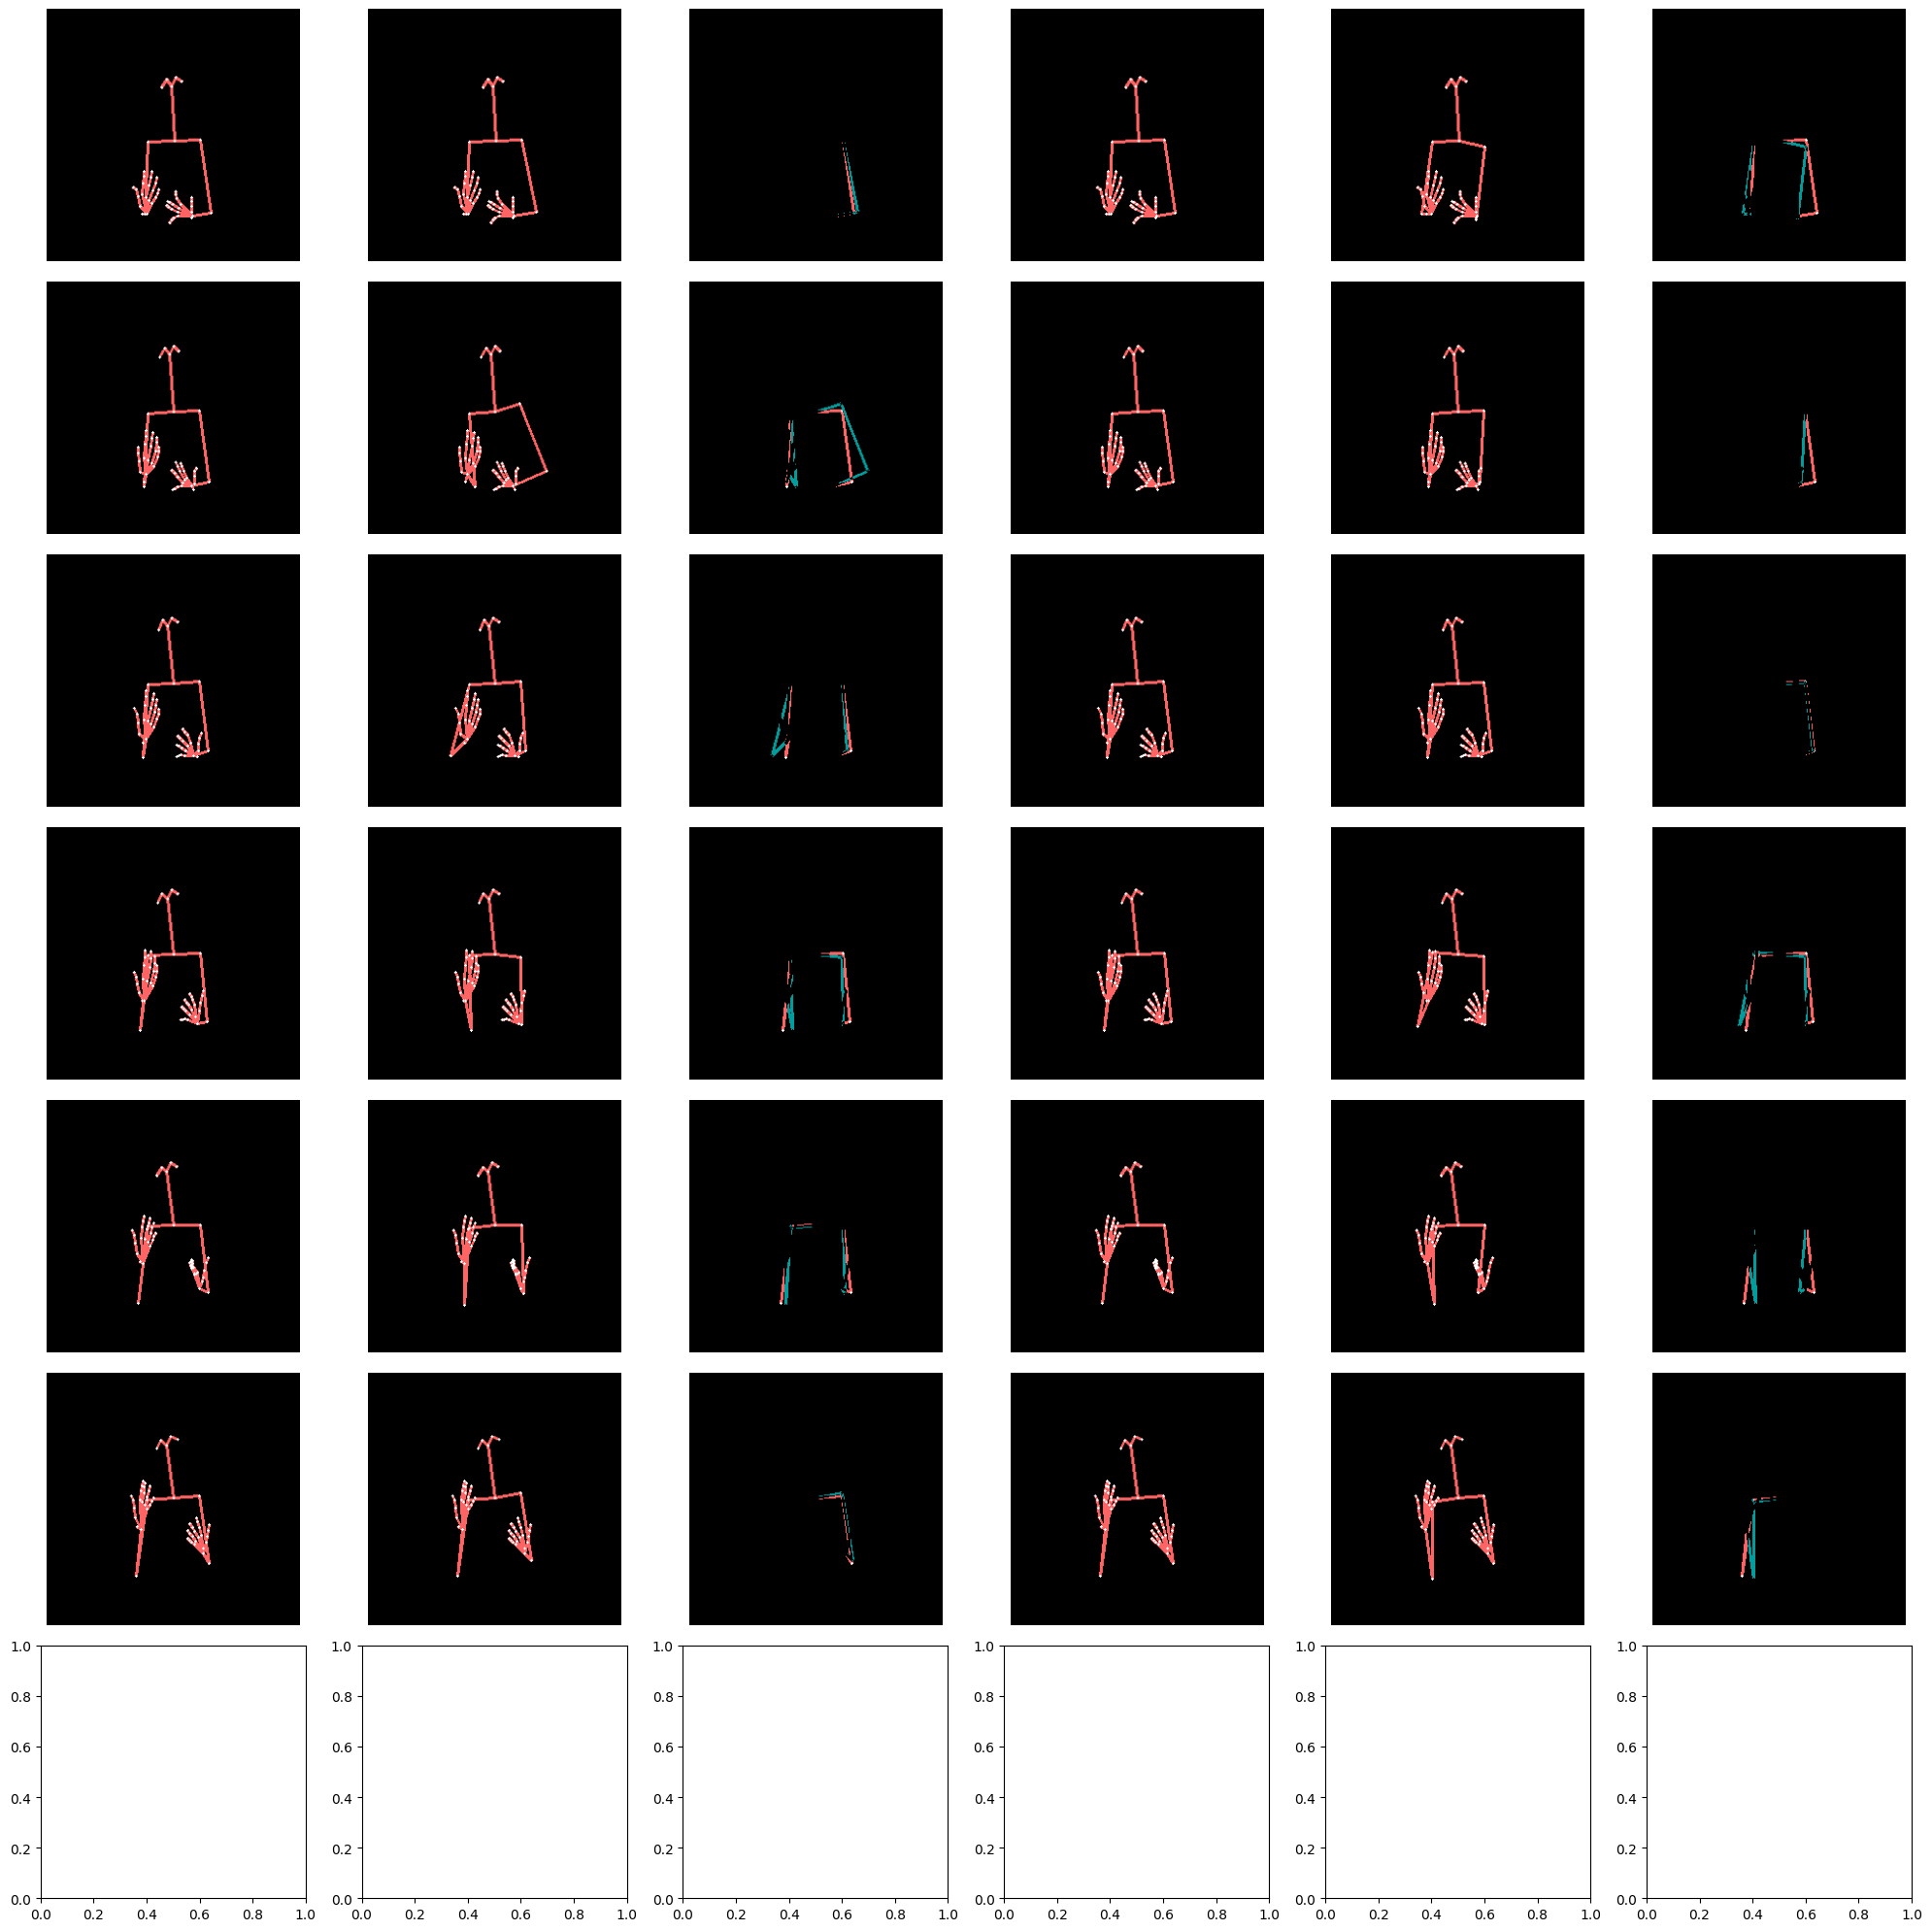

In [92]:

import torch
import copy

depth_map  = train_loader.dataset.data[0]
depth_map = torch.tensor(depth_map, device='cuda')#.clone()


fig, axs = plt.subplots(7, 6, figsize=(20, 20))
for i in range(6):
    for j in range(2):
        #try:
            depth_map_transformed = train_set.augmentation.augment_arm_joint_rotate(copy.deepcopy(depth_map),
                                                                                    probability=0.5, 
                                                                                    angle_range=(-15, 15))
            frame = depth_map[i] 
            frame_transformed = depth_map_transformed[i]

            img_frame = drawer.draw_lines(frame)
            img_frame_transformed = drawer.draw_lines(frame_transformed)
            img_frame_diff = img_frame - img_frame_transformed

            for w,img in enumerate([img_frame,
                                    img_frame_transformed,img_frame_diff]):
                axs[i, 3*j+w].imshow(img)
                axs[i, 3*j+w].axis('off')            
        #except:
        #    pass
plt.tight_layout() 
plt.show()

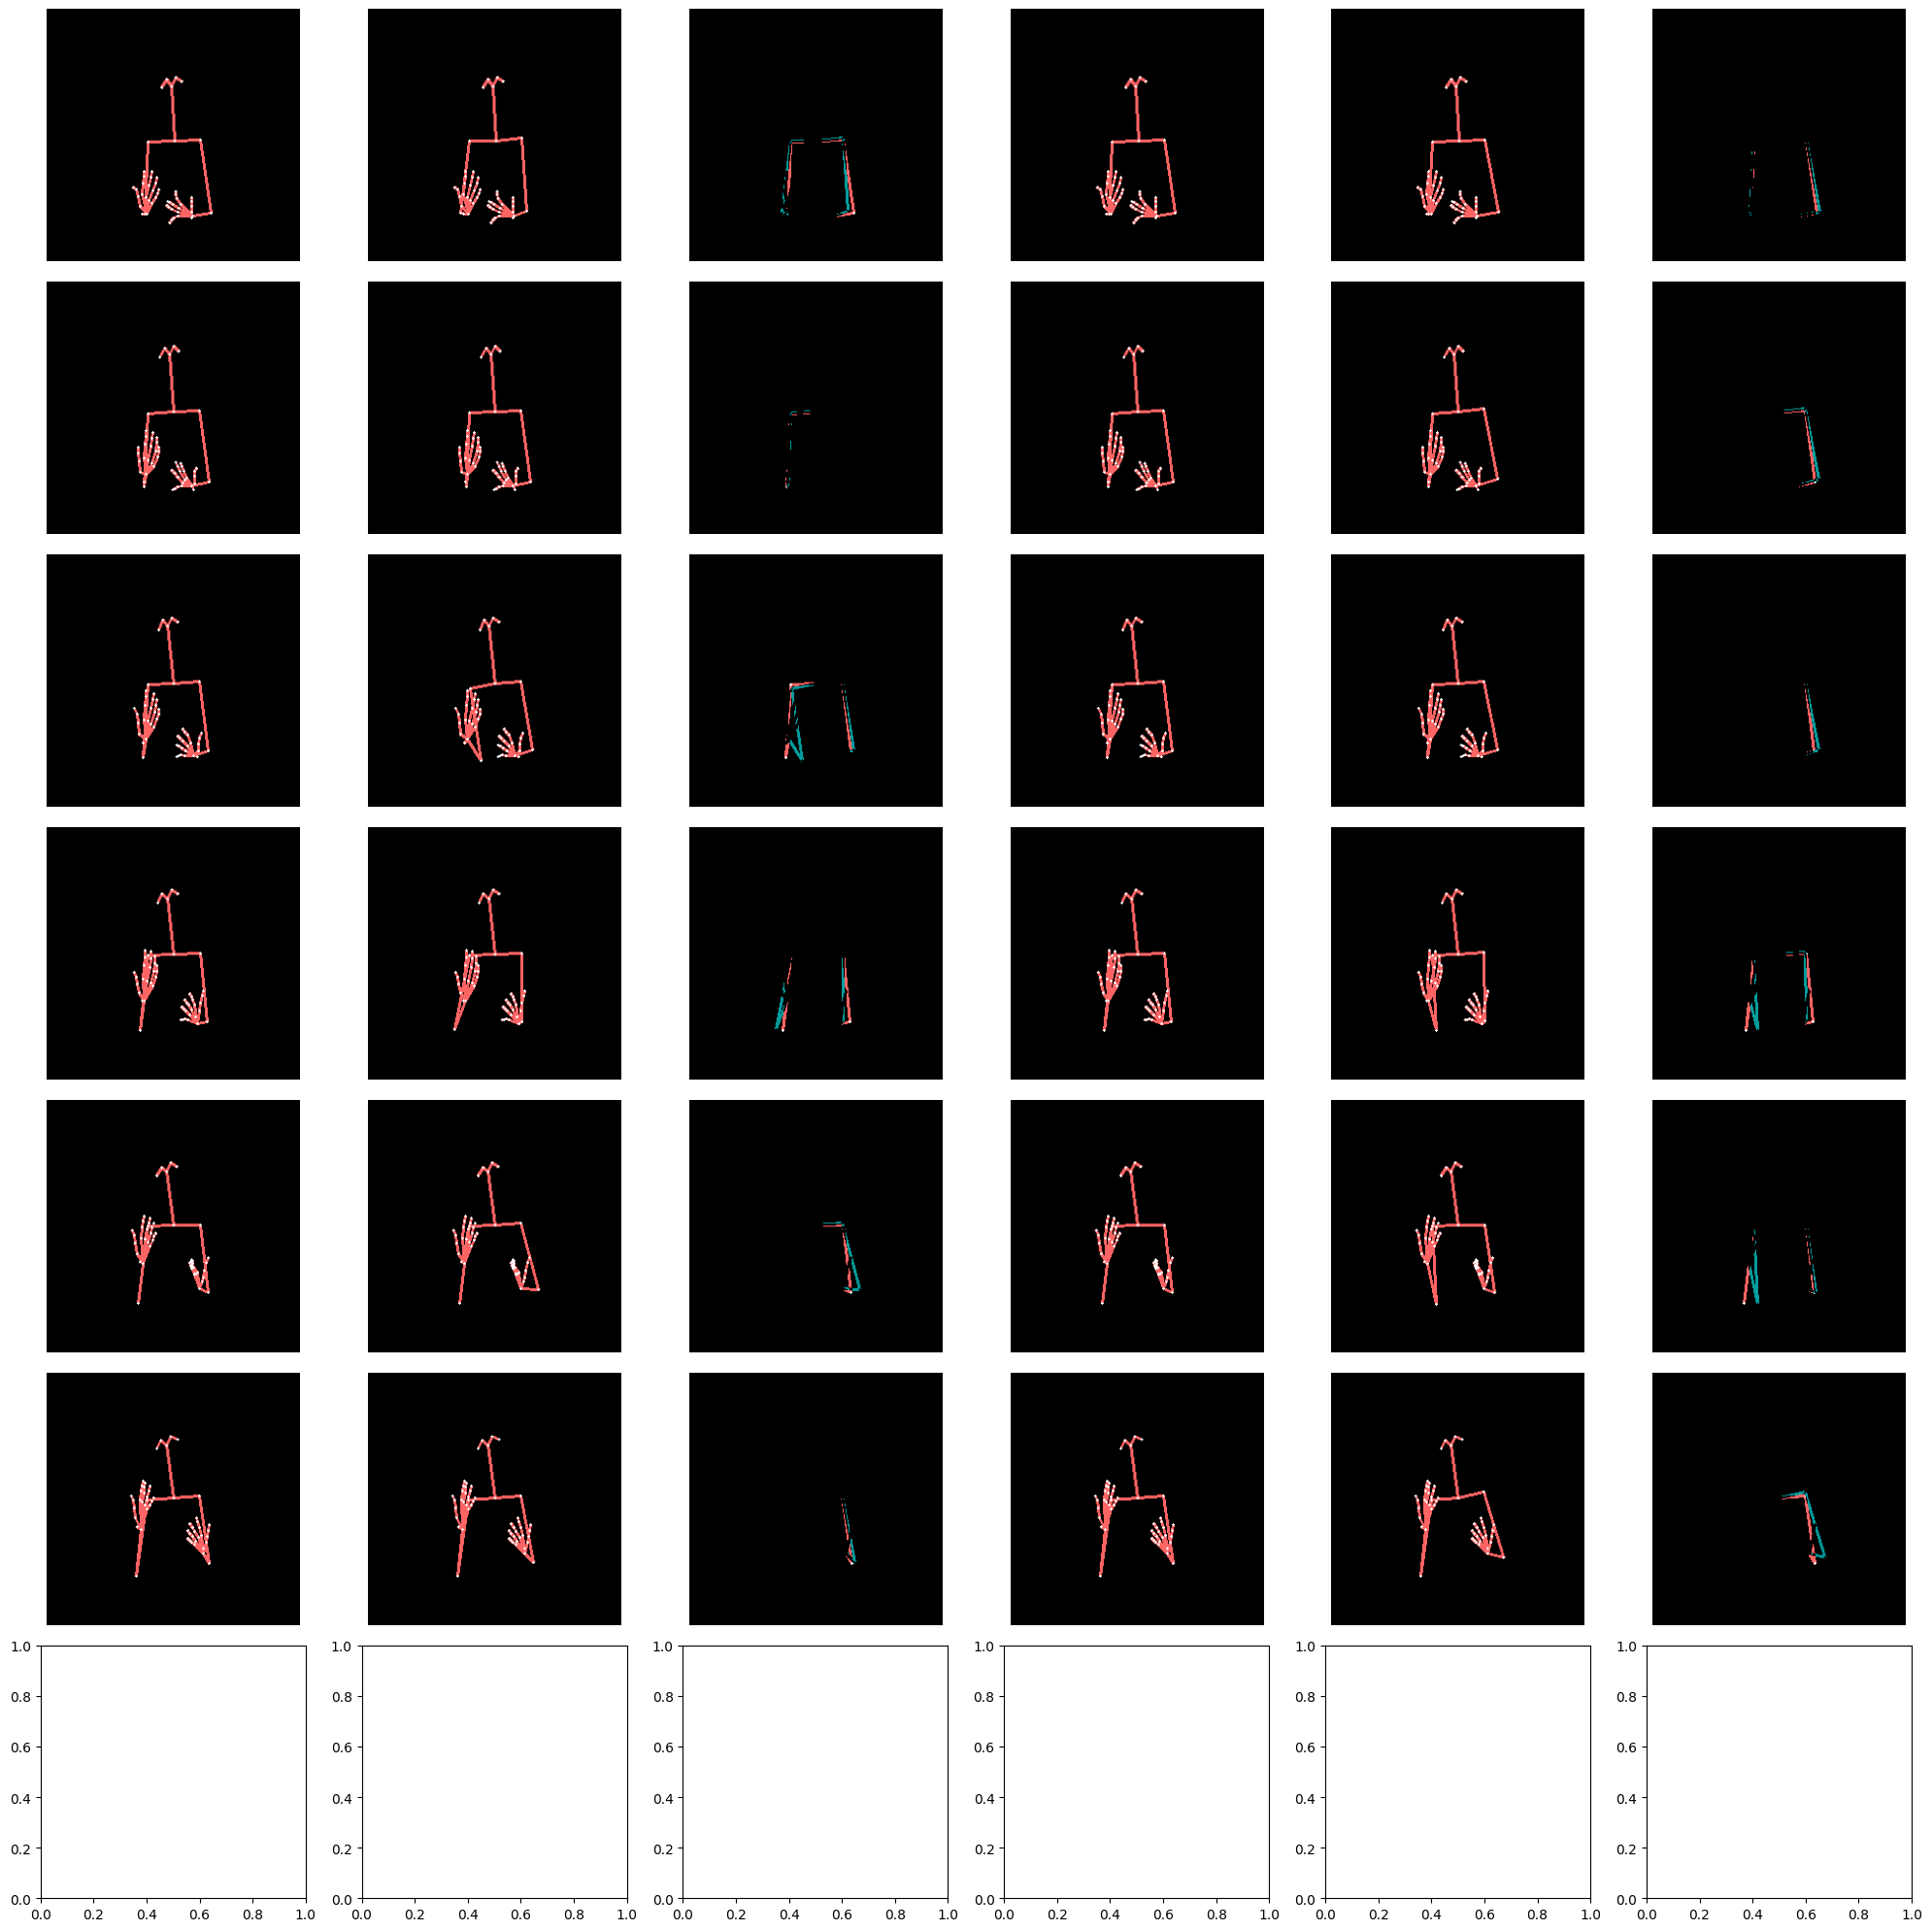

In [105]:

import torch
import copy

depth_map  = train_loader.dataset.data[0]
depth_map = torch.tensor(depth_map, device='cuda')#.clone()


fig, axs = plt.subplots(7, 6, figsize=(20, 20))
for i in range(6):
    for j in range(2):
        #try:
            depth_map_transformed = train_set.augmentation.augment_arm_joint_rotate(copy.deepcopy(depth_map),
                                                                                    probability=0.5, 
                                                                                    angle_range=(-10, 10))
            frame = depth_map[i] 
            frame_transformed = depth_map_transformed[i]

            img_frame = drawer.draw_lines(frame)
            img_frame_transformed = drawer.draw_lines(frame_transformed)
            img_frame_diff = img_frame - img_frame_transformed

            for w,img in enumerate([img_frame,
                                    img_frame_transformed,img_frame_diff]):
                axs[i, 3*j+w].imshow(img)
                axs[i, 3*j+w].axis('off')            
        #except:
        #    pass
plt.tight_layout() 
plt.show()